In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/heart_disease_uci.csv')

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

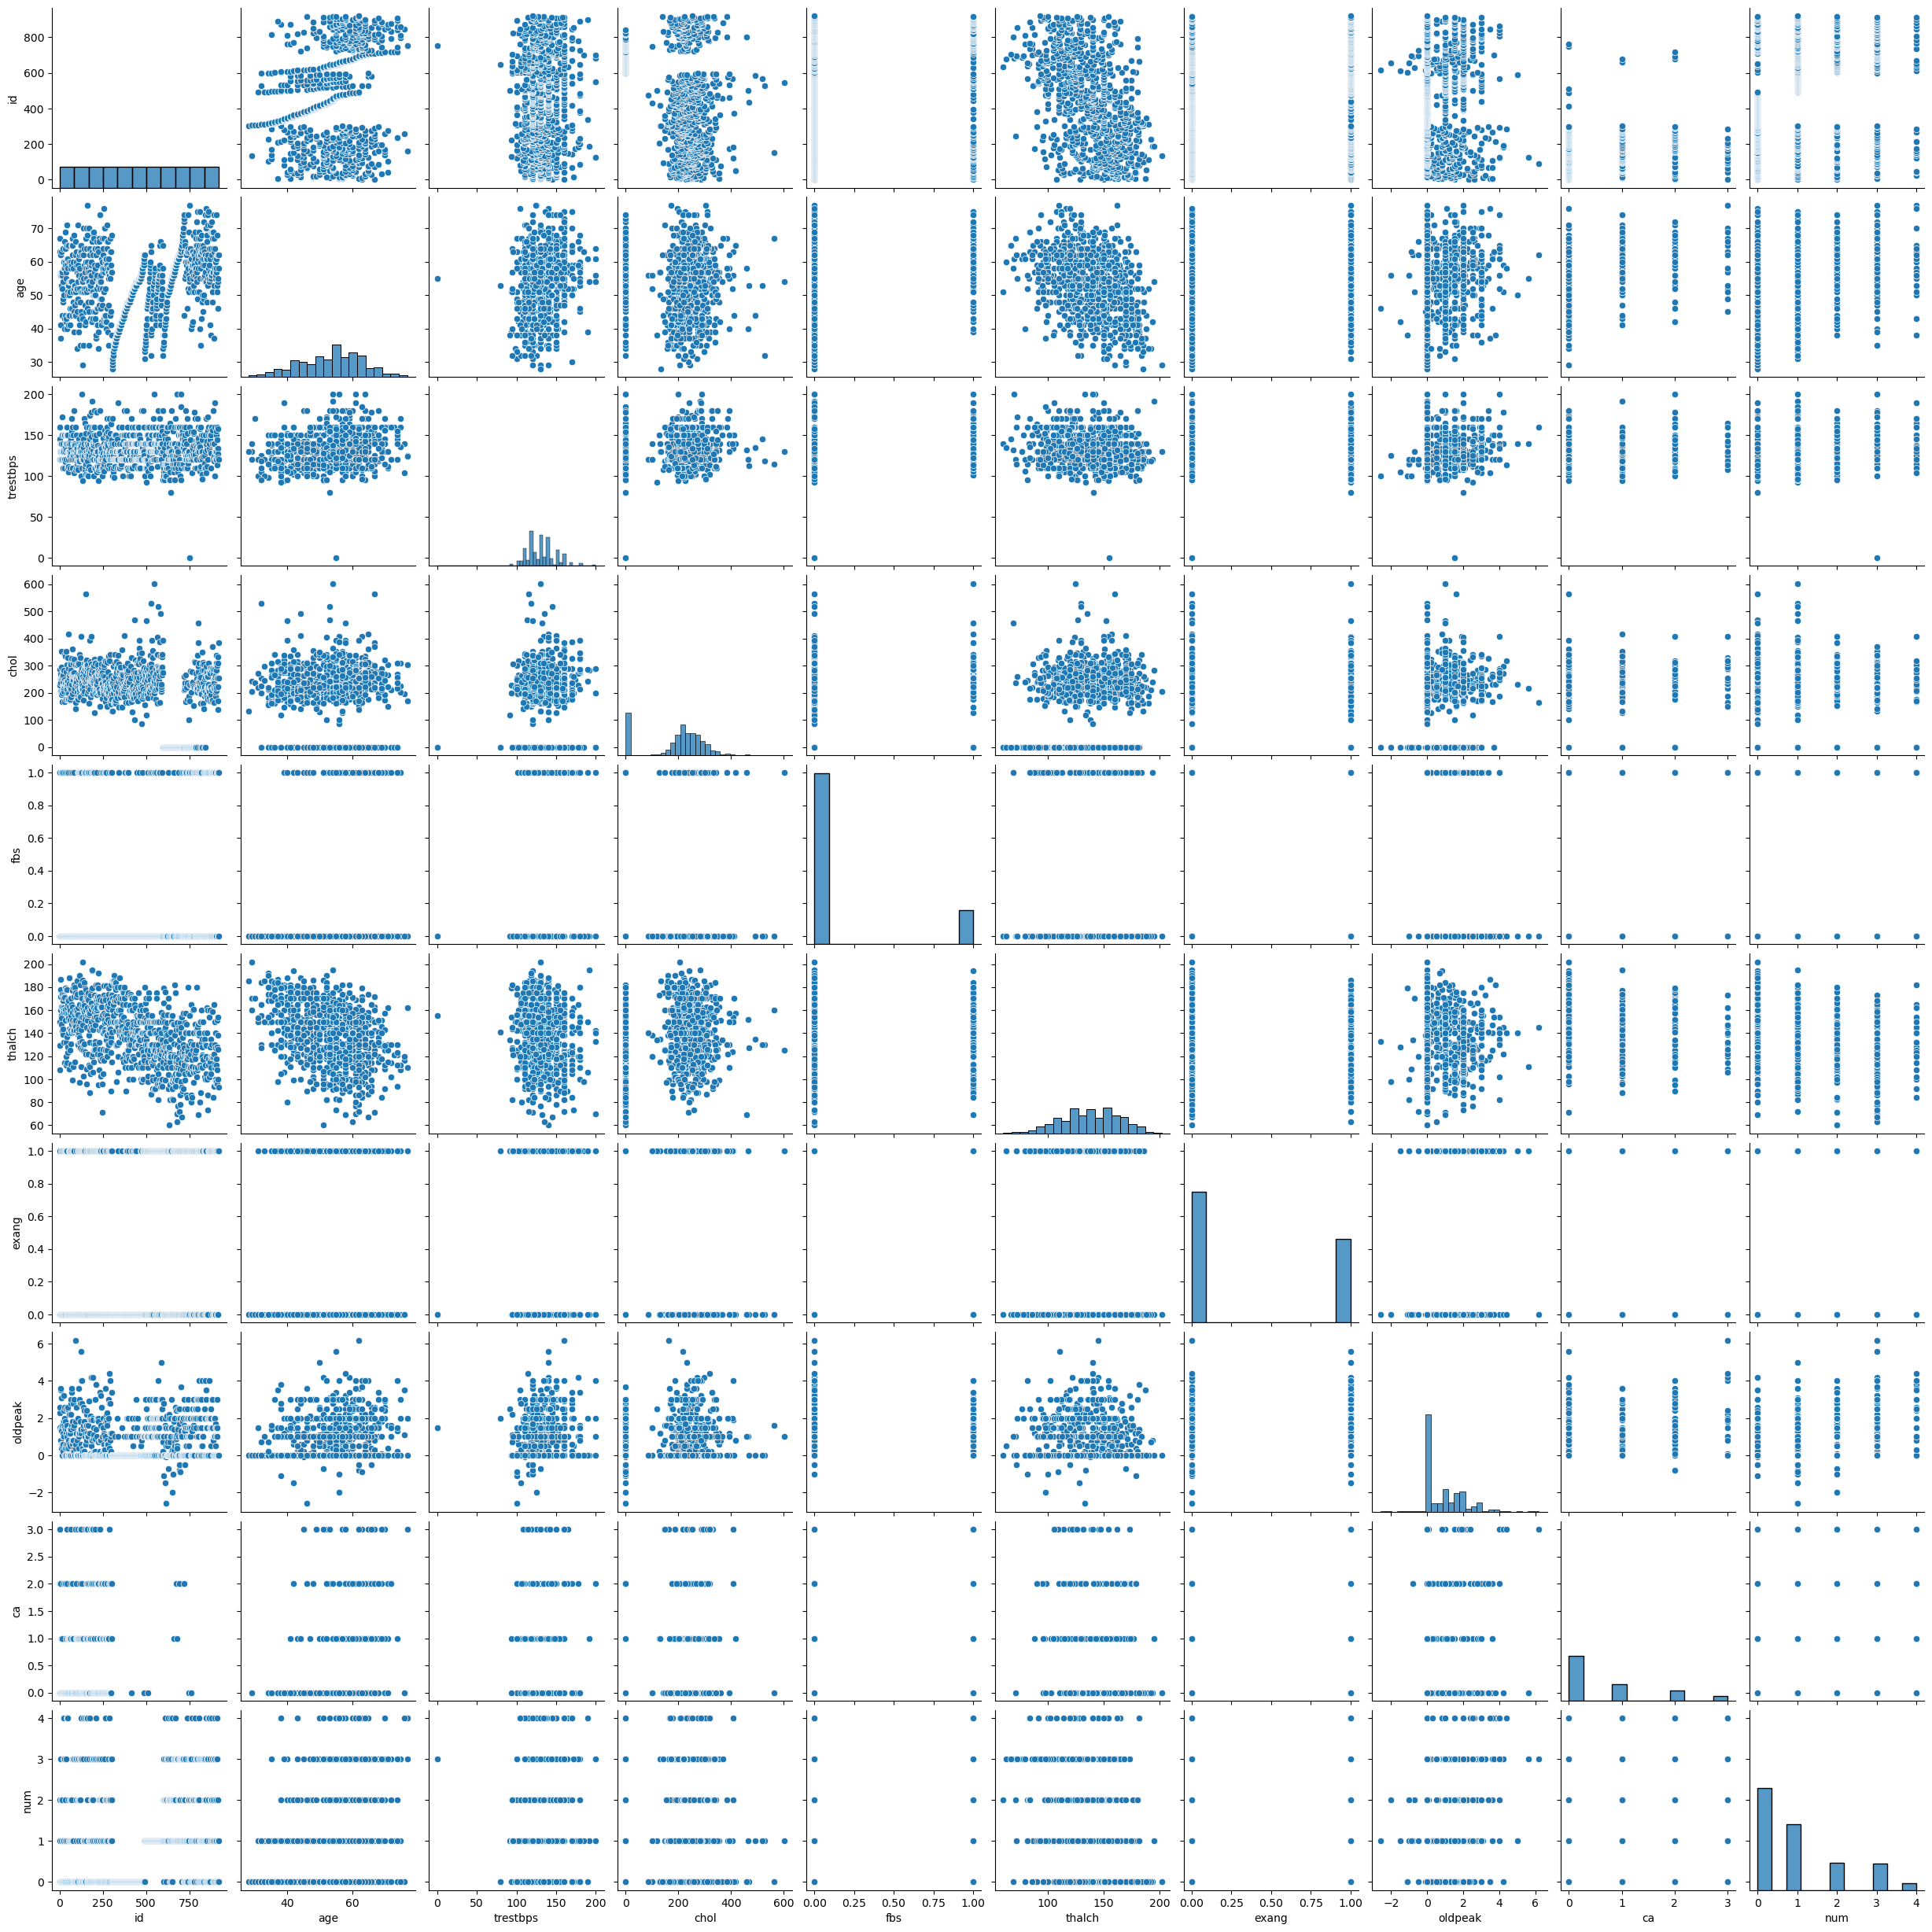

In [6]:
sns.pairplot(data=df)

In [7]:
df = df.drop('dataset', axis=1)

In [8]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [9]:
missing = df.isnull().sum()

In [10]:
missing[missing > 0]

trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

In [11]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].median())

In [12]:
df['chol'] = df['chol'].fillna(df['chol'].median())

In [13]:
df['thalch'] = df['thalch'].fillna(df['thalch'].median())

In [14]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

In [15]:
missing = df.isnull().sum()

In [16]:
missing[missing > 0]

fbs         90
restecg      2
exang       55
slope      309
ca         611
thal       486
dtype: int64

In [17]:
columns_to_convert = ['fbs', 'exang']

df[columns_to_convert] = df[columns_to_convert].replace({
    True: 1,
    False: 0
})

/tmp/ipykernel_10077/1448992765.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_convert] = df[columns_to_convert].replace({


In [18]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,typical angina,145.0,233.0,1.0,lv hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,0.0,lv hypertrophy,108.0,1.0,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,0.0,lv hypertrophy,129.0,1.0,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,0.0,lv hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal,0


In [20]:
missing = df.isnull().sum()
missing[missing > 0]

fbs         90
restecg      2
exang       55
slope      309
ca         611
thal       486
dtype: int64

In [21]:
df['fbs'] = df['fbs'].fillna(df['fbs'].mode())
df['exang'] = df['exang'].fillna(df['exang'].mode())

In [23]:
missing = df.isnull().sum()
missing[missing > 0]

fbs         90
restecg      2
exang       55
slope      309
ca         611
thal       486
dtype: int64

In [24]:
import numpy as np
df = df.replace('?', np.nan)

In [25]:
columns_to_convert = ['fbs', 'exang']
for col in columns_to_convert:
    df[col] = df[col].astype(str).str.upper().str.strip()
    df[col] = df[col].replace('NAN', np.nan)

In [28]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,typical angina,145.0,233.0,1.0,lv hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,0.0,lv hypertrophy,108.0,1.0,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,0.0,lv hypertrophy,129.0,1.0,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,0.0,lv hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal,0


In [31]:
columns_to_fix = ['fbs', 'exang']

for col in columns_to_fix:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    if df[col].isnull().any():
        impute_value = df[col].mode()[0]
        df[col] = df[col].fillna(impute_value)
    
    df[col] = df[col].round().astype('int64')

In [32]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


In [33]:
misisng = df.isnull().sum()
missing[missing > 0]

fbs         90
restecg      2
exang       55
slope      309
ca         611
thal       486
dtype: int64

In [37]:
mode_val = df['fbs'].mode()[0]

df['fbs'] = df['fbs'].fillna(mode_val)

In [38]:
mode_val = df['exang'].mode()[0]

df['exang'] = df['exang'].fillna(mode_val)

In [39]:
misisng = df.isnull().sum()
missing[missing > 0]

fbs         90
restecg      2
exang       55
slope      309
ca         611
thal       486
dtype: int64

In [42]:
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)

/tmp/ipykernel_10077/114775579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)


In [43]:
misisng = df.isnull().sum()
missing[missing > 0]

fbs         90
restecg      2
exang       55
slope      309
ca         611
thal       486
dtype: int64

In [44]:
mode_fbs = df['fbs'].mode()[0]
df['fbs'] = df['fbs'].fillna(mode_fbs)

mode_exang = df['exang'].mode()[0]
df['exang'] = df['exang'].fillna(mode_exang)

In [45]:
misisng = df.isnull().sum()
missing[missing > 0]

fbs         90
restecg      2
exang       55
slope      309
ca         611
thal       486
dtype: int64

In [46]:
a = df['fbs'].isnull().sum()

In [47]:
a[a > 0]

array([], dtype=int64)

In [48]:
df['fbs'].unique()

array([1, 0])

In [49]:
df['exang'].unique()

array([0, 1])

In [50]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


In [51]:
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])

In [52]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [53]:
df['thal'] = df['thal'].fillna('thal_missing')

In [54]:
df['ca_missing'] = df['ca'].isnull().astype(int)

In [55]:
ca_mode = df['ca'].mode()[0]
df['ca'] = df['ca'].fillna(ca_mode)

In [56]:
df['ca'] = df['ca'].astype('int64')

In [58]:
m = df.isnull().sum()
m[m > 0]

Series([], dtype: int64)

In [59]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,ca_missing
0,1,63,Male,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0,fixed defect,0,0
1,2,67,Male,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3,normal,2,0
2,3,67,Male,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2,reversable defect,1,0
3,4,37,Male,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0,normal,0,0
4,5,41,Female,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0,normal,0,0


In [60]:
ohe_cols = ['sex', 'cp', 'restecg', 'slope', 'thal', 'ca']

df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)

,id,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca_missing,sex_Male,...,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,thal_thal_missing,ca_1,ca_2,ca_3,target
0,1,63,145.0,233.0,1,150.0,0,2.3,0,True,...,False,False,False,False,False,False,False,False,False,0
1,2,67,160.0,286.0,0,108.0,1,1.5,0,True,...,False,True,False,True,False,False,False,False,True,1
2,3,67,120.0,229.0,0,129.0,1,2.6,0,True,...,False,True,False,False,True,False,False,True,False,1
3,4,37,130.0,250.0,0,187.0,0,3.5,0,True,...,False,False,False,True,False,False,False,False,False,0
4,5,41,130.0,204.0,0,172.0,0,1.4,0,False,...,False,False,True,True,False,False,False,False,False,0


In [64]:
df = df.drop('num', axis=1)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
from sklearn.preprocessing import StandardScaler

In [68]:
X = df.drop('target', axis=1)

In [69]:
y = df['target']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [72]:
scaler = StandardScaler()

In [73]:
scaled_x_train = scaler.fit_transform(X_train)

In [74]:
scaled_x_test = scaler.transform(X_test)

In [76]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(
    cv=5,               
    scoring='roc_auc',    
    random_state=42,      
    solver='liblinear',   
    Cs=10,                
    penalty='l2',         
    n_jobs=-1            
)

In [77]:
model.fit(scaled_x_train, y_train)

LogisticRegressionCV(cv=5, n_jobs=-1, random_state=42, scoring='roc_auc',
                     solver='liblinear')

In [78]:
y_predictions = model.predict(scaled_x_test)

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [81]:
accuracy_score(y_test, y_predictions)

0.782608695652174

In [82]:
matrix = confusion_matrix(y_test, y_predictions)

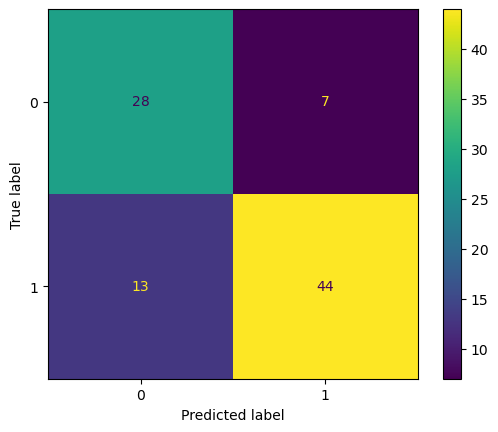

In [84]:
a = ConfusionMatrixDisplay(matrix)
a.plot()
plt.show()

In [85]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74        35
           1       0.86      0.77      0.81        57

    accuracy                           0.78        92
   macro avg       0.77      0.79      0.78        92
weighted avg       0.79      0.78      0.79        92



In [86]:
df.head()

,id,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca_missing,sex_Male,...,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,thal_thal_missing,ca_1,ca_2,ca_3,target
0,1,63,145.0,233.0,1,150.0,0,2.3,0,True,...,False,False,False,False,False,False,False,False,False,0
1,2,67,160.0,286.0,0,108.0,1,1.5,0,True,...,False,True,False,True,False,False,False,False,True,1
2,3,67,120.0,229.0,0,129.0,1,2.6,0,True,...,False,True,False,False,True,False,False,True,False,1
3,4,37,130.0,250.0,0,187.0,0,3.5,0,True,...,False,False,False,True,False,False,False,False,False,0
4,5,41,130.0,204.0,0,172.0,0,1.4,0,False,...,False,False,True,True,False,False,False,False,False,0


In [88]:
new_data_raw = pd.DataFrame({
    'age': [45], 
    'sex': ['Male'], 
    'cp': ['non-anginal'], 
    'trestbps': [120], 
    'chol': [200], 
    'fbs': [0], 
    'restecg': ['normal'], 
    'thalch': [180], 
    'exang': [0], 
    'oldpeak': [0.5], 
    'slope': ['upsloping'], 
    'ca': [0], 
    'thal': ['normal']
})

In [89]:
ohe_cols = ['sex', 'cp', 'restecg', 'slope', 'thal', 'ca']

new_data = pd.get_dummies(new_data_raw, columns=ohe_cols, drop_first=True)

In [95]:
new_data

,age,trestbps,chol,fbs,thalch,exang,oldpeak
0,45,120,200,0,180,0,0.5


In [97]:
new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

In [101]:
scald_new_data = scaler.transform(new_data)

In [102]:
y_predictions2 = model.predict(scald_new_data)

In [103]:
y_predictions2

array([0])